**Import required packages**

In [2]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import h5py
from scipy import fftpack
from scipy import signal
from scipy import io
from scipy import stats
from itertools import compress
from sklearn.preprocessing import normalize

import plotly
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)

import my_functions as my

**Specify path for files to be processed**

In [3]:
maindir = Path.home() / 'Documents' / 'Data' / 'Cerebellum' / 'TES'
# maindir = Path.home() / 'Documents' / 'MATLAB' / 'ESMA'
subject = 'temp'
session = '020419'

trial = 11

file_name = maindir / subject / session / 'trial{}.mat'.format(trial)
video_name = maindir / subject / session / 'trial{}.mp4'.format(trial)

print('Processing......', subject, '-', session, '-', 'trial{}.mat'.format(trial))

Processing...... temp - 020419 - trial11.mat


**Play video file**

In [4]:
my.play_video_file(str(video_name))

**Load data & select channels**

In [5]:
f = h5py.File(file_name, 'r')  # r for read only
print("Available fields: ", list(f.keys()))  # f is a dictionary. Let's look at the keys
# Create variables from loaded dictionary
data = f['data'][:].transpose(); data = (data/800)*1e6
time = f['time'][0,:]
fs = f['fs'][0] # The loaded fs value is wrong. Correct fs is 16000 Hz
fs = 16000
# Print summary
print('Neural data shape: ', data.shape)
print('Sample rate: ', fs, 'Hz')
print('Duration: ', data.shape[0]/fs, 'sec')

Available fields:  ['data', 'fs', 'time']
Neural data shape:  (80000, 32)
Sample rate:  16000 Hz
Duration:  5.0 sec


In [6]:
# Re-organize columns in ascending order wrt wireless amplifier
ind_map_1 = [1,9,2,10,3,11,4,12,5,13,6,14,7,15,8,16,17,25,18,26,19,27,20,28,21,29,22,30,23,31,24,32]
# The above is 1-indexing for Matlab. For Python, we need to use 0-indexing:
ind_map_0 = [i-1 for i in ind_map_1]

data = data[:,ind_map_0]

# Specify "good" channels
NC = 31,
unknown = (28,30)
gnd = (15,17,19,21,23,25,27,29)
crus2 = (1,3,5,7,9,11,13)
crus1 = (14,16,18,20,22,24,26)
pml = (0,2,4,6,8,10,12)

# Assign raw data
rpml = data[:,pml]
rcrus1 = data[:,crus1]
rcrus2 = data[:,crus2]
rgnd = data[:,gnd]
rother = data[:,NC+unknown]

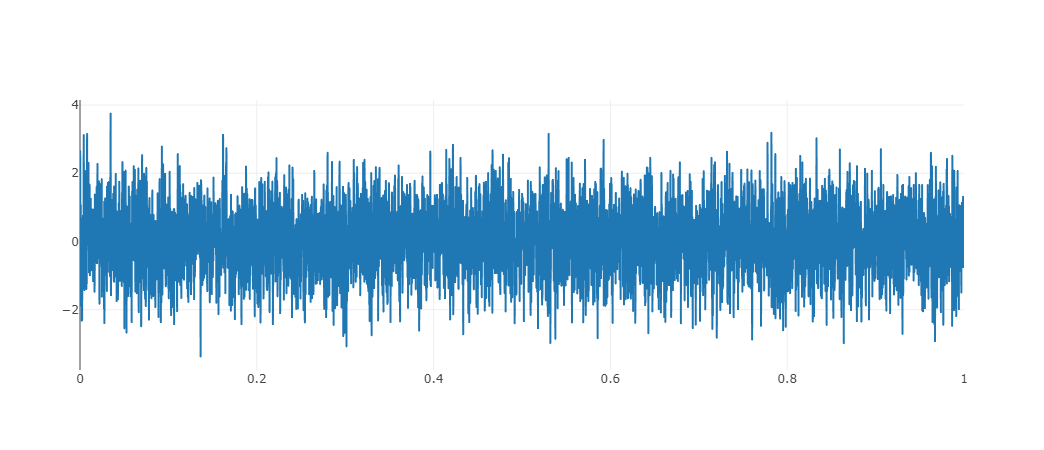

In [7]:
import plotly.plotly as py
import plotly.graph_objs as go

# Create random data with numpy
import numpy as np

N = 5000
random_x = np.linspace(0, 1, N)
random_y = np.random.randn(N)

# Create a trace
trace = go.Scattergl(
    x = random_x,
    y = random_y
)

plotly.offline.iplot([trace], filename='basic-line')

In [8]:
def fancy_plot(traces, title):
    trace = [{'type' : 'scattergl',
        'x': time,
        'y': col,
        'name' : ind
    }  for ind,col in enumerate(traces.T)]

    layout = go.Layout(
        width = 800,
        height = 500,
        title = title,
        xaxis = dict(
          title = "time(s)"
        ),
        yaxis = dict(
          title = "uV"
        )
    )

    fig = dict(data=trace, layout=layout)

    plotly.offline.iplot(fig, filename=title)

In [ ]:
fancy_plot(rcrus1, 'raw PML')